In [144]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=50, centers=3, cluster_std=1.0, random_state=3)

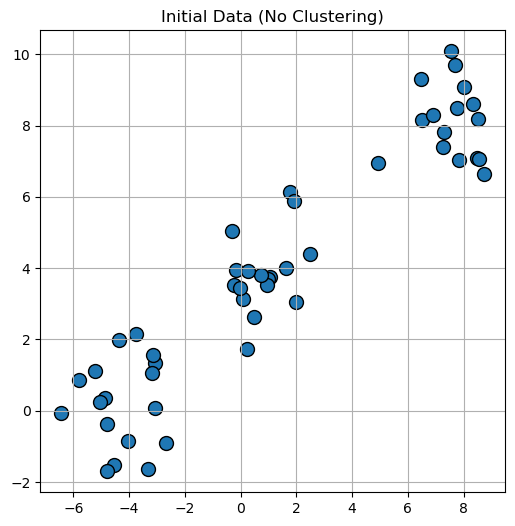

In [145]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, edgecolor='k')
plt.title("Initial Data (No Clustering)")
plt.grid(True)
plt.show()

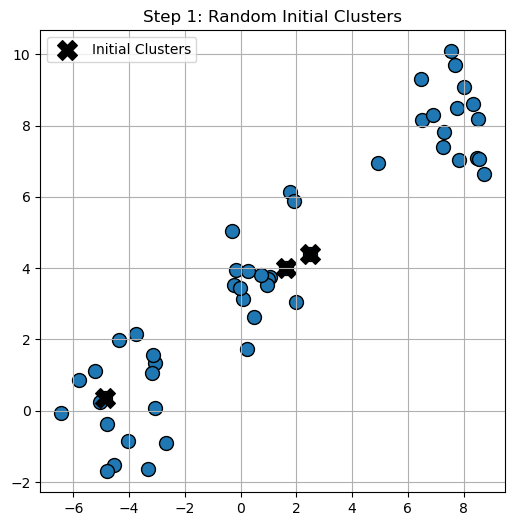

In [146]:
np.random.seed(3)
k = 3 # Number of clusters
clusters = X[np.random.choice(len(X), k, replace=False)]

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, edgecolor='k')
plt.scatter(clusters[:, 0], clusters[:, 1], c='black', s=200, marker='X', label="Initial Clusters")
plt.title("Step 1: Random Initial Clusters")
plt.legend()
plt.grid(True)
plt.show()

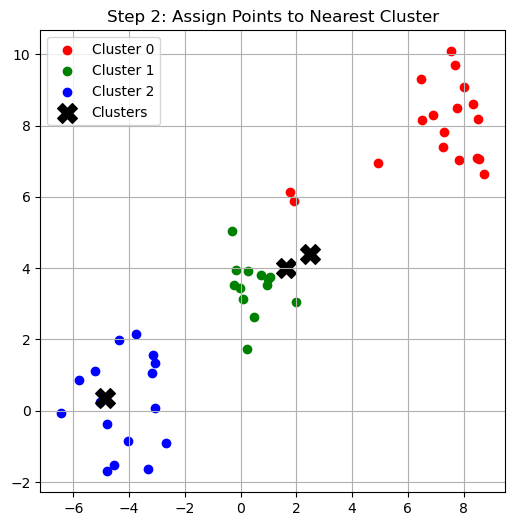

In [147]:
def assign_clusters(X, clusters):
    distances = np.linalg.norm(X[:, np.newaxis] - clusters, axis=2)
    return np.argmin(distances, axis=1)

labels = assign_clusters(X, clusters)

colors = ['red', 'green', 'blue']
plt.figure(figsize=(6, 6))
for i in range(k):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f"Cluster {i}")
plt.scatter(clusters[:, 0], clusters[:, 1], c='black', s=200, marker='X', label="Clusters")
plt.title("Step 2: Assign Points to Nearest Cluster")
plt.legend()
plt.grid(True)
plt.show()

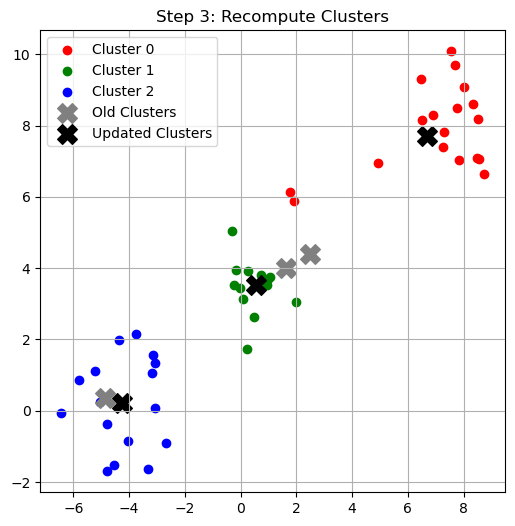

In [148]:
def compute_clusters(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

new_clusters = compute_clusters(X, labels, k)

plt.figure(figsize=(6, 6))
for i in range(k):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f"Cluster {i}")
plt.scatter(clusters[:, 0], clusters[:, 1], c='gray', s=200, marker='X', label="Old Clusters")
plt.scatter(new_clusters[:, 0], new_clusters[:, 1], c='black', s=200, marker='X', label="Updated Clusters")
plt.title("Step 3: Recompute Clusters")
plt.legend()
plt.grid(True)
plt.show()

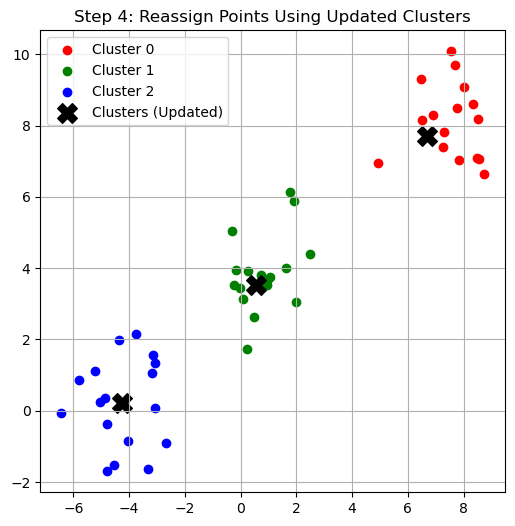

In [149]:
clusters = new_clusters
labels = assign_clusters(X, clusters)

plt.figure(figsize=(6, 6))
for i in range(k):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f"Cluster {i}")
plt.scatter(clusters[:, 0], clusters[:, 1], c='black', s=200, marker='X', label="Clusters (Updated)")
plt.title("Step 4: Reassign Points Using Updated Clusters")
plt.legend()
plt.grid(True)
plt.show()